Маємо дані від двох готелей з наступними показниками:

Hotel – тип готелю (City Hotel або Resort Hotel)

Is canceled – бронювання було скасовано (1) чи ні (0); не скасоване вважається успішним

Lead time – кількість днів, що пройшли між датою бронювання та датою прибуття

Arrival full date – повна дата прибуття

Arrival date year – рік прибуття

Arrival date month – місяць прибуття

Arrival date week number – номер тижня прибуття

Arrival date day of month – день прибуття

Stays in weekend nights – кількість вихідних (субота чи неділя), які відвідувач забронював для проживання в готелі.

Stays in week nights – кількість днів (з понеділка по п'ятницю), які відвідувач забронював для проживання в готелі.

Stays total nights – загальна кількість заброньованих ночей (сума двох попередніх колонок)

Adults – кількість дорослих
Children – кількість дітей
Babies – кількість немовлят

Meal – вибраний тип живлення

Country – країна походження клієнта

Reserved room type – тип зарезервованого номера
Assigned room type – тип отриманого номера (може відрізнятись від заброньованого)

Customer type – тип бронювання

Reservation status – значення останнього статусу броні:
Canceled – було скасовано клієнтом; Check-Out – клієнт зареєструвався, але вже покинув готель;

No-Show - клієнт не зареєструвався та повідомив адміністрації готелю причину

Reservation status date – дата оновлення статусу

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [202]:
sns.set(style = "whitegrid",
    rc    = {'figure.figsize':(10,6)},
    palette = "pastel"
)

In [12]:
booking=pd.read_csv('../data/bookings.csv', 
            sep=';')

In [13]:
booking

,Hotel,Is Canceled,Lead Time,arrival full date,Arrival Date Year,Arrival Date Month,Arrival Date Week Number,Arrival Date Day of Month,Stays in Weekend nights,Stays in week nights,...,Adults,Children,Babies,Meal,Country,Reserved Room Type,Assigned room type,customer type,Reservation Status,Reservation status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017-08-30,2017,August,35,30,2,5,...,2,0.0,0,BB,BEL,A,A,Transient,Check-Out,2017-09-06
119386,City Hotel,0,102,2017-08-31,2017,August,35,31,2,5,...,3,0.0,0,BB,FRA,E,E,Transient,Check-Out,2017-09-07
119387,City Hotel,0,34,2017-08-31,2017,August,35,31,2,5,...,2,0.0,0,BB,DEU,D,D,Transient,Check-Out,2017-09-07
119388,City Hotel,0,109,2017-08-31,2017,August,35,31,2,5,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2017-09-07


In [14]:
booking.shape

(119390, 21)

In [15]:
booking.dtypes

Hotel                         object
Is Canceled                    int64
Lead Time                      int64
arrival full date             object
Arrival Date Year              int64
Arrival Date Month            object
Arrival Date Week Number       int64
Arrival Date Day of Month      int64
Stays in Weekend nights        int64
Stays in week nights           int64
stays total nights             int64
Adults                         int64
Children                     float64
Babies                         int64
Meal                          object
Country                       object
Reserved Room Type            object
Assigned room type            object
customer type                 object
Reservation Status            object
Reservation status_date       object
dtype: object

In [16]:
booking.dtypes.value_counts()

object     10
int64      10
float64     1
dtype: int64

In [167]:
booking.isna().sum()

hotel                        0
is_canceled                  0
lead_time                    0
arrival_full_date            0
arrival_date_year            0
arrival_date_month           0
arrival_date_week_number     0
arrival_date_day_of_month    0
stays_in_weekend_nights      0
stays_in_week_nights         0
stays_total_nights           0
adults                       0
children                     0
babies                       0
meal                         0
country                      0
reserved_room_type           0
assigned_room_type           0
customer_type                0
reservation_status           0
reservation_status_date      0
total_kids                   0
has_kids                     0
dtype: int64

In [17]:
def lower_and_undescore(raw):
    
    return raw.lower().replace(" ", '_')

lower_and_undescore('Stays in Weekend nights')

'stays_in_weekend_nights'

In [18]:
booking=booking.rename(columns=lower_and_undescore)

In [19]:
booking

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,adults,children,babies,meal,country,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017-08-30,2017,August,35,30,2,5,...,2,0.0,0,BB,BEL,A,A,Transient,Check-Out,2017-09-06
119386,City Hotel,0,102,2017-08-31,2017,August,35,31,2,5,...,3,0.0,0,BB,FRA,E,E,Transient,Check-Out,2017-09-07
119387,City Hotel,0,34,2017-08-31,2017,August,35,31,2,5,...,2,0.0,0,BB,DEU,D,D,Transient,Check-Out,2017-09-07
119388,City Hotel,0,109,2017-08-31,2017,August,35,31,2,5,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2017-09-07


Топ 5 країн, де клієнти зробили найбільшу кількість успішних бронювань

In [20]:
booking_by_country = booking.query('is_canceled==0')\
        .groupby('country', as_index=False)\
        .agg({'hotel':'count'})\
        .rename(columns={"hotel":'successfully'})\
        .sort_values("successfully", ascending=False)[:5]

In [21]:
#short way to sort 
booking.query('is_canceled==0')\
    .country \
    .value_counts()[:5]

PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
Name: country, dtype: int64

In [22]:
booking_by_country

,country,successfully
125,PRT,21071
57,GBR,9676
54,FRA,8481
50,ESP,6391
42,DEU,6069


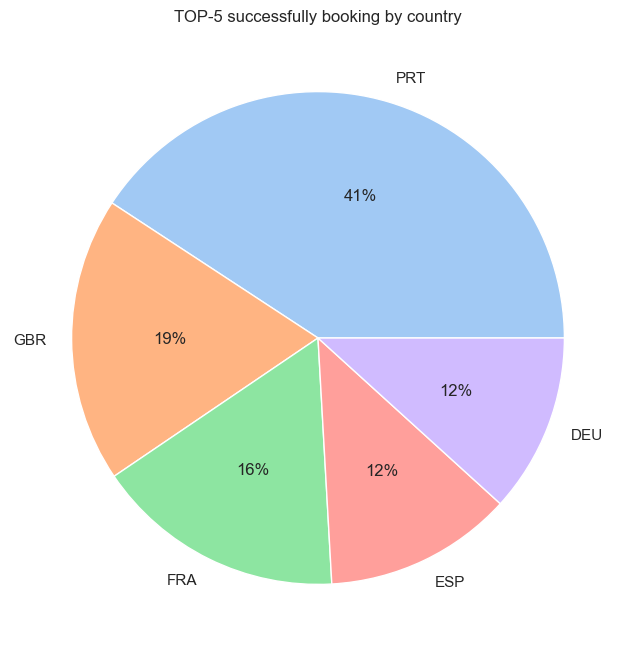

In [203]:
#create pie chart
plt.figure(figsize=(10, 8))
plt.pie(x=booking_by_country['successfully'], labels=booking_by_country['country'], autopct='%.0f%%')
plt.title('TOP-5 successfully booking by country');

Отже для гостей з PRT та GBR можна зробити заохочувальні знижки чи додати подарунки, щоб збільшити відвідувачів з інших країн можна збільшити рекламу або ж також запровадити спеціальні акції 

Який готель обирають частіше гості з різних країн?

In [128]:
hotel_by_country = booking.query('is_canceled == 0')\
.groupby(['country','hotel'], as_index=False)\
.size()\
.rename(columns={'size':'number of client'})

In [129]:
hotel_by_country

,country,hotel,number of client
0,ABW,City Hotel,2
1,AGO,City Hotel,140
2,AGO,Resort Hotel,17
3,AIA,City Hotel,1
4,ALB,City Hotel,8
...,...,...,...
263,VNM,Resort Hotel,2
264,ZAF,City Hotel,36
265,ZAF,Resort Hotel,13
266,ZMB,Resort Hotel,1


In [130]:
#Перегляд кількості бронювань в кожному з готелів для конкретної країни
hotel_by_country[hotel_by_country['country'] == 'ZAF']

,country,hotel,number of client
264,ZAF,City Hotel,36
265,ZAF,Resort Hotel,13


На скільки в середньому ночей бронюють готель?

In [204]:
avr_per_nights = booking.groupby('hotel', as_index=False)\
    .agg({'stays_total_nights':'mean'})\
    .round(2)
#round(decimals=2) in pandas, ndigits=2 in python
#round(3.45553892, ndigits=2)

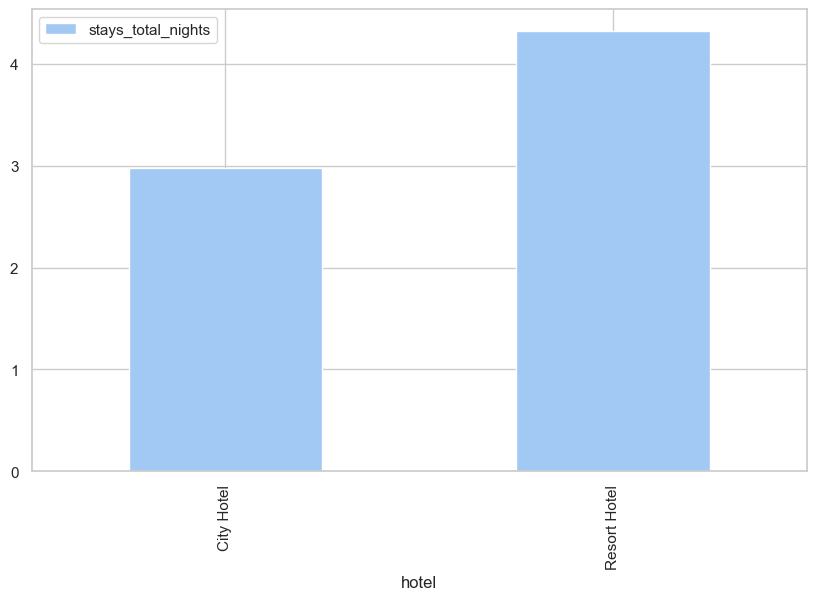

In [205]:
avr_per_nights.plot(kind='bar', x='hotel');

Кількість записів для кожного готелю

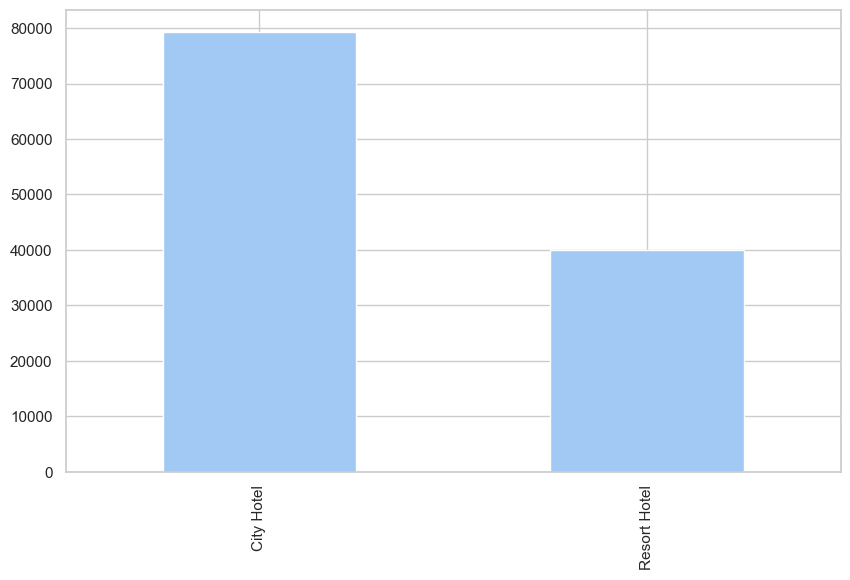

In [206]:
booking.hotel.value_counts().plot(kind='bar');

З вище наведених графіків можемо зробити висновок, що хоч і City Hotel обирають більше людей, Resort Hotel є більш популярнішим для довшого перебування. Можливо City Hotel потрібно покращити умови для гостей, щоб вони бажали залишитись там наніч.

In [131]:
print('Нижче число неспівпадаючих типів номерів в заказі гостя з отримани в готелі. Це може статись по причині овербукінга.')
display(booking.query('assigned_room_type!=reserved_room_type').shape[0])

Нижче число неспівпадаючих типів номерів в заказі гостя з отримани в готелі. Це може статись по причині овербукінга.


14917

Переглянемо як змінювалась протягом років кількість скасованих та успішних бронювань в готелях.

In [132]:
booking['arrival_date_year'].unique()

array([2015, 2016, 2017], dtype=int64)

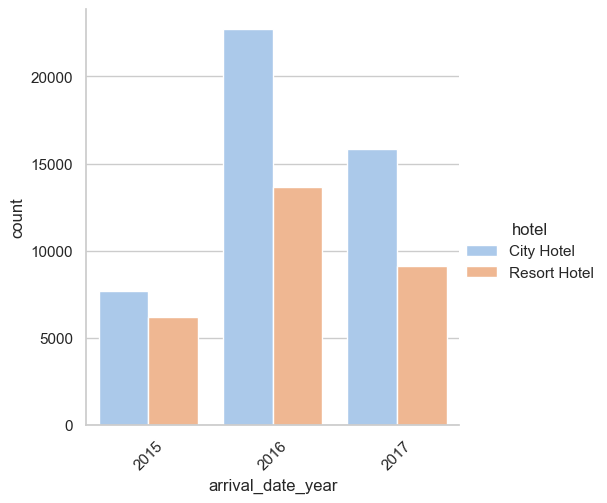

In [207]:
not_cancel_by_year = booking.query('is_canceled == 0')\
.groupby(['hotel','arrival_date_year']).size().reset_index(name='count')

g = sns.catplot(data=not_cancel_by_year, x='arrival_date_year', y='count', hue='hotel', kind='bar')
g.set_xticklabels(rotation=45)
plt.show()


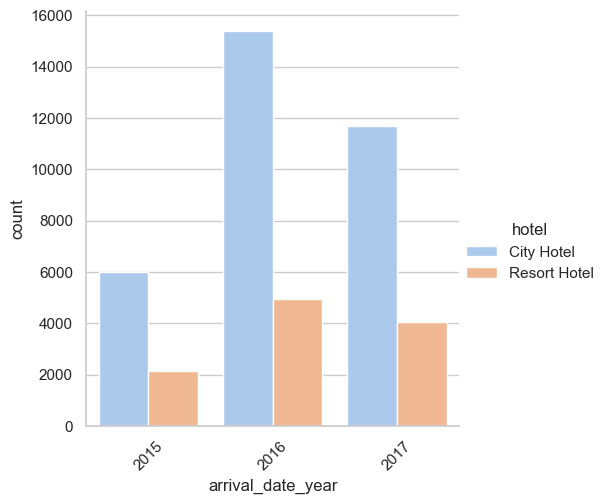

In [208]:
cancel_by_year = booking.query('is_canceled == 1')\
.groupby(['hotel','arrival_date_year']).size().reset_index(name='count')

g = sns.catplot(data=cancel_by_year, x='arrival_date_year', y='count', hue='hotel', kind='bar')
g.set_xticklabels(rotation=45)
plt.show()


Бачимо, що тенденція до успішних бронювань та скасованих зберігається протягом трьох років

Переглянемо найпопулярніші місяці бронювань по роках

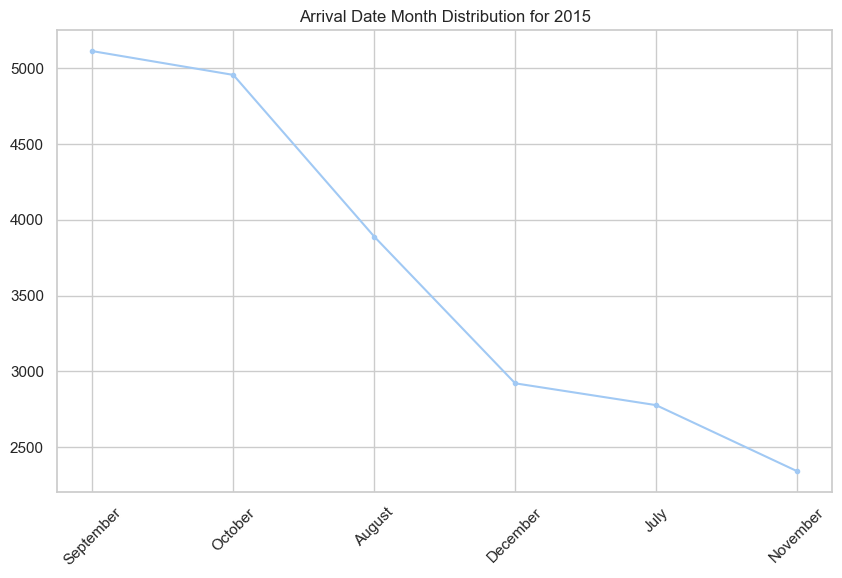

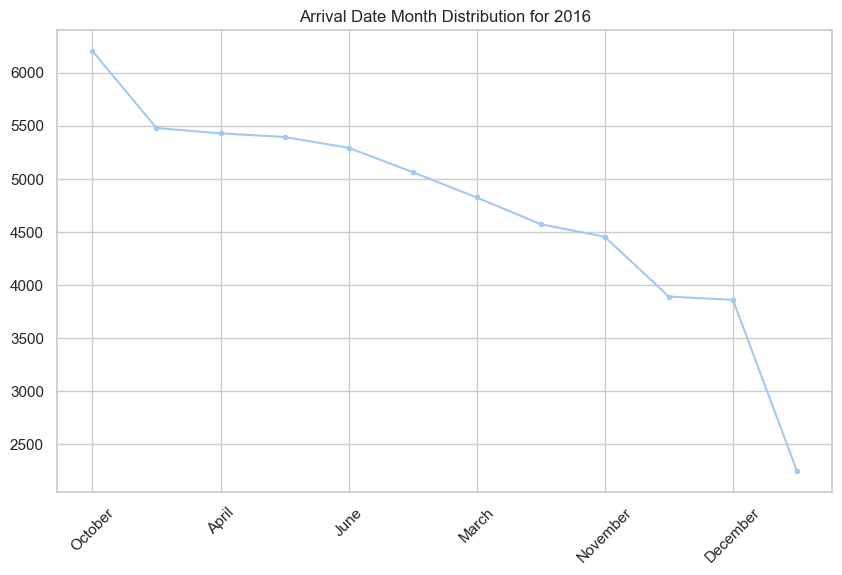

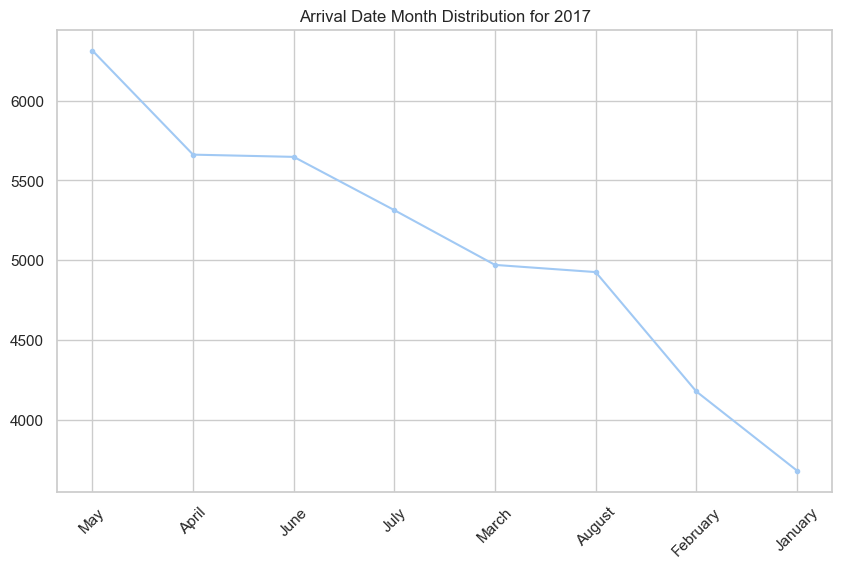

In [209]:
years = [i for i in booking['arrival_date_year'].unique()]

for year in years:
    data = booking.query(f'arrival_date_year == {year}')\
                  .arrival_date_month \
                  .value_counts()
    data.plot(kind='line', title=f'Arrival Date Month Distribution for {year}', marker='.')
    plt.xticks(rotation=45)
    plt.show()


Висновки:

для 2015 року найпопулярнішим місяцем був Вересень,

для 2016 - Жовтень,

для 2017 - Травень.

Подивимось в які ж місяці найчастіше відміняють бронювання в кожному з готелів

In [181]:
booking.query('hotel=="City Hotel" and is_canceled==1')\
    .groupby(['arrival_date_year','arrival_date_month'], as_index=False)\
    .agg({"is_canceled":"count"})\
    .sort_values(['is_canceled','arrival_date_year'], ascending=False)

,arrival_date_year,arrival_date_month,is_canceled
25,2017,May,2217
16,2016,October,1947
18,2017,April,1926
23,2017,June,1808
12,2016,June,1720
17,2016,September,1567
5,2015,September,1543
6,2016,April,1539
14,2016,May,1436
15,2016,November,1360


В **City Hotel** Вересень(2015), Жовтень(2016) та Травень(2017) мають найбільше скасованих бронювань

In [210]:
booking.query('hotel=="Resort Hotel" and is_canceled==1')\
    .groupby(['arrival_date_year','arrival_date_month'], as_index=False)\
    .agg({"is_canceled":"count"})\
    .sort_values(['is_canceled','arrival_date_year'], ascending=False)

,arrival_date_year,arrival_date_month,is_canceled
19,2017,August,693
22,2017,July,660
23,2017,June,631
7,2016,August,578
16,2016,October,567
5,2015,September,551
25,2017,May,545
18,2017,April,537
6,2016,April,522
14,2016,May,479


**Resort Hotel** ситуація трішки відрізняється, по скасуванню найпопулярнішими місяцями є Вересень (2015) та Серпень(2016 та 2017)

Також бачимо, що в City Hotel набагато більше скасованих бронювань протягом усього періоду

Переглянемо певну статистику щодо кількості дітей в номерах

In [33]:
print('Середнє значення по кількості дорослих, дітей, малюків в номерах готелів')
display(booking[["adults","children",'babies']].mean())

Середнє значення по кількості дорослих, дітей, малюків в номерах готелів


adults      1.856403
children    0.103890
babies      0.007949
dtype: float64

Створення колонки з загальною кількістю дітей в номері

In [34]:
#нова колонка з точною кількістю дітей в номері
booking["total_kids"]=booking.children+booking.babies

In [35]:
booking.query('total_kids!=0').hotel.sort_values(ascending=False)

13        Resort Hotel
26647     Resort Hotel
26657     Resort Hotel
26665     Resort Hotel
26669     Resort Hotel
              ...     
71263       City Hotel
71262       City Hotel
71209       City Hotel
71193       City Hotel
119319      City Hotel
Name: hotel, Length: 9336, dtype: object

In [36]:
booking.groupby("hotel")\
    .agg({'total_kids':'mean'})\
    .round(2)\
    .max()

total_kids    0.14
dtype: float64

In [211]:
#нова колонка з наявністю дітей в номері
booking['has_kids']=booking.total_kids>0 
booking['has_kids']

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Name: has_kids, Length: 119390, dtype: bool

Порахуємо відсоток скасованих бронювань для двох груп: гості з дітьми та гості без дітей

Для клієнтів без дітей

In [38]:
no_kids_churn = booking.query("is_canceled == 1 & has_kids == False").shape[0] / booking.query(" has_kids == False").shape[0] 
no_kids_churn = round(no_kids_churn * 100, 2)

In [39]:
no_kids_churn

37.22

Для кдієнтів з дітьми

In [40]:
yes_kids_churn = booking.query("is_canceled == 1 & has_kids == True").shape[0] / booking.query("has_kids == True").shape[0] 
yes_kids_churn = round(yes_kids_churn * 100, 2)

In [41]:
yes_kids_churn

34.92

Створення моделі для прогнозування скасування броні в готелях, використовуючи інформацію по lead_time, stays_in_weekend_nights, stays_in_week_nights, adults, children та babies, які, ймовірно, мають важливий вплив на рішення про скасування бронювання.

In [214]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [213]:
booking.fillna(0, inplace=True)

# Відокремлення ознак та цільової змінної
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies']
X = booking[features]
y = booking['is_canceled']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = HistGradientBoostingClassifier()

# Гіперпараметри для пошуку
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 2, 4]
}

# Пошук найкращих параметрів за допомогою GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Найкращі гіперпараметри
best_params = grid_search.best_params_
print('Best Parameters:', best_params)

# Використання найкращої моделі
best_model = grid_search.best_estimator_

# Прогнозування на тестовому наборі
y_pred = best_model.predict(X_test)

# Оцінка точності моделі
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Виведення звіту про класифікацію
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'max_depth': 7, 'min_samples_leaf': 2}
Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.91      0.79     14907
           1       0.71      0.36      0.48      8971

    accuracy                           0.70     23878
   macro avg       0.70      0.64      0.64     23878
weighted avg       0.70      0.70      0.67     23878



На підставі цього звіту, можна сказати, що модель має добру точність для класу успішних бронювань, але показує менш задовільні результати для класу скасування бронювань. 

Порівняємо показники з іншими моделями машинного навчання такими як Random Forest та Logistic Regression

In [215]:
# Відокремлення ознак та цільової змінної
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies']
X = booking[features]
y = booking['is_canceled']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = [
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Logistic Regression', LogisticRegression())
]

# Навчання та оцінка моделей
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    print(f'Model: {name}')
    print(f'Accuracy: {accuracy:.2f}')
    print('Classification Report:\n', classification_rep)
    print('---')


Model: Random Forest
Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81     14907
           1       0.70      0.54      0.61      8971

    accuracy                           0.74     23878
   macro avg       0.73      0.70      0.71     23878
weighted avg       0.74      0.74      0.73     23878

---
Model: Gradient Boosting
Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.92      0.78     14907
           1       0.68      0.29      0.41      8971

    accuracy                           0.68     23878
   macro avg       0.68      0.60      0.59     23878
weighted avg       0.68      0.68      0.64     23878

---
Model: Logistic Regression
Accuracy: 0.66
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.89      0.77     14907
           1       0.61      0.28      


Бачимо, що Random Forest дає найкращу точність, варто використовувати її.

*Висновки*

Ця модель прогнозування скасування бронювань в готелі може бути корисною для різних цілей і в сфері готельного бізнесу вона може знайти декілька практичних застосувань:

1. **Управління запасами та персоналом:** Модель може допомогти готелям прогнозувати кількість гостей, які скасують свої бронювання. Це дозволяє готелям налаштовувати запаси продуктів, персонал та інші ресурси відповідно до очікуваної кількості гостей.

2. **Маркетинг та акції:** Модель може допомогти впроваджувати цілеспрямовані маркетингові акції для тих, хто має намір скасувати бронювання. Знижки, пропозиції або інші стимули можуть бути надані, щоб залучити таких гостей і підвищити шанси на успішне бронювання.

3. **Оптимізація вартості:** Прогнозуючи скасування бронювань, готелі можуть оптимізувати свої прибутки та вартість, шляхом кращого управління ресурсами та резерваціями.

4. **Управління ризиками:** Модель може допомогти готелям передбачити та вчасно реагувати на скасування, зокрема в періоди з великою популярністю або важливими подіями, коли скасування може негативно вплинути на їхню репутацію.

5. **Покращення обслуговування гостей:** З знанням того, що гість має намір скасувати бронювання, готель може звернутися до нього з індивідуальною пропозицією або питаннями щодо їхніх потреб, що допоможе врятувати бронювання.

6. **Планування подій:** Модель може бути використана для прогнозування числа гостей на конкретний період часу, що допоможе в організації подій, зустрічей та інших подій у готелі.